In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install category-encoders

In [3]:
import category_encoders as ce

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv("./drive/MyDrive/Rahnema_college/boot_camp_entry/100k_a.csv", names=['user_id', 'stream_id', 'streamer_name', 'start_time', 'stop_time'])

In [5]:
df.head()

,user_id,stream_id,streamer_name,start_time,stop_time
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594


In [6]:
encoder= ce.OrdinalEncoder(cols=['streamer_name'],return_df=True)
df = encoder.fit_transform(df)
df.head()

,user_id,stream_id,streamer_name,start_time,stop_time
0,1,33842865744,1,154,156
1,1,33846768288,2,166,169
2,1,33886469056,1,587,588
3,1,33887624992,3,589,591
4,1,33890145056,4,591,594


In [7]:
df.shape

(3051733, 5)

In [8]:
df.isnull().sum()

user_id          0
stream_id        0
streamer_name    0
start_time       0
stop_time        0
dtype: int64

In [9]:
df.dtypes

user_id          int64
stream_id        int64
streamer_name    int64
start_time       int64
stop_time        int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3051733.0,5.032313e+04,2.889476e+04,1.000000e+00,2.528400e+04,5.029900e+04,7.545200e+04,1.000000e+05
stream_id,3051733.0,3.413002e+10,1.682242e+08,3.380153e+10,3.398884e+10,3.413069e+10,3.427399e+10,3.441642e+10
streamer_name,3051733.0,1.530565e+04,2.956505e+04,1.000000e+00,7.260000e+02,2.957000e+03,1.277400e+04,1.626250e+05
start_time,3051733.0,3.146044e+03,1.772520e+03,0.000000e+00,1.618000e+03,3.174000e+03,4.676000e+03,6.147000e+03
stop_time,3051733.0,3.149186e+03,1.772656e+03,1.000000e+00,1.620000e+03,3.178000e+03,4.679000e+03,6.148000e+03


In [11]:
print('number of twitch users: ', len(df.user_id.unique()))
print('numeber of stream id: ', len(df.stream_id.unique()), 'then this is not useful feature !!!')
print('number of twitch channel: ', len(df.streamer_name.unique()))

number of twitch users:  100000
numeber of stream id:  739991 then this is not useful feature !!!
number of twitch channel:  162625


explore data before adding features .e.g time spend feature  

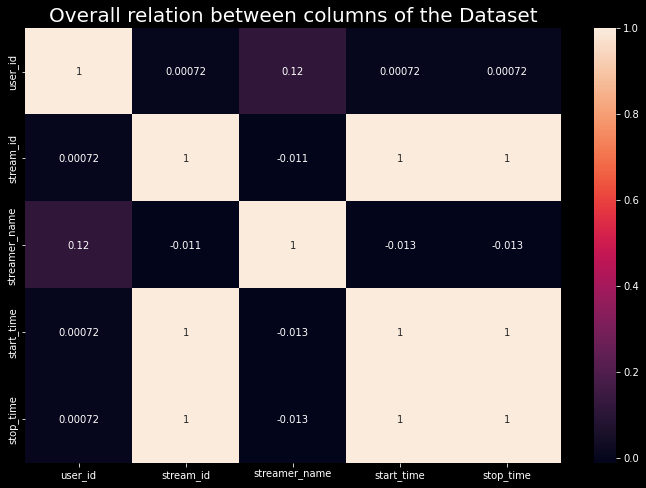

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

After adding features ... 

In [13]:
df['time_spend'] = df['stop_time'] - df['start_time']
print('maximum time spend in stream: ', df['time_spend'].max())
print('minimum time spend in stream: ', df['time_spend'].min())

maximum time spend in stream:  97
minimum time spend in stream:  1


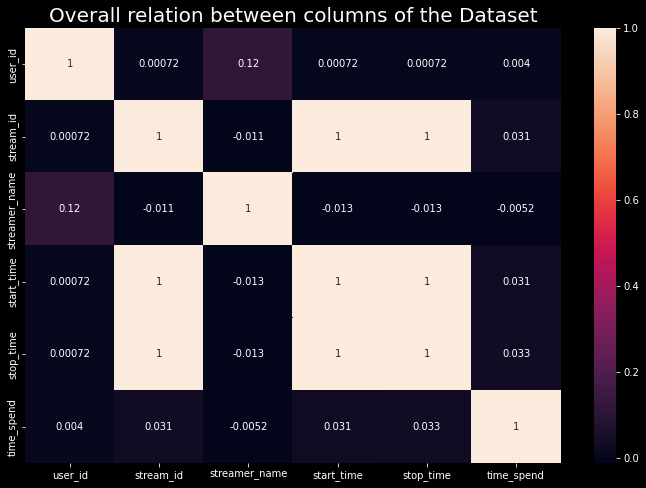

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

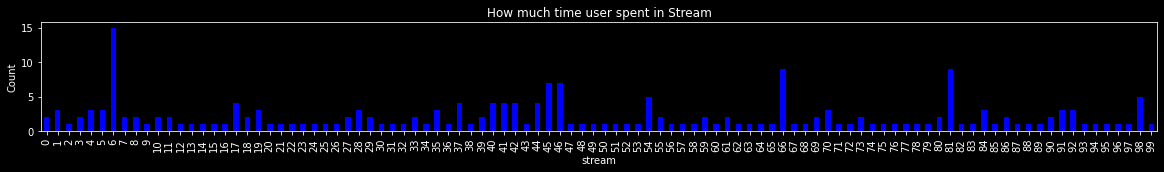

In [15]:
plt.figure(figsize = (20, 2))
(df['stop_time'] - df['start_time']).head(100).plot.bar(color='blue')
plt.title('How much time user spent in Stream')
plt.xlabel('stream')
plt.ylabel('Count')
plt.show()

sorted 

In [16]:
df.sort_values(by='start_time')

,user_id,stream_id,streamer_name,start_time,stop_time,time_spend
342354,11587,33827617344,1867,0,5,5
408838,13763,33827755632,6846,0,1,1
408837,13763,33827475024,18106,0,1,1
408836,13763,33827351664,4950,0,1,1
408835,13763,33827169440,47619,0,1,1
...,...,...,...,...,...,...
265396,8976,34415693328,728,6147,6148,1
897283,29710,34414041536,203,6147,6148,1
1257772,41486,34416038384,2525,6147,6148,1
2562409,84281,34413422016,2191,6147,6148,1
